# Using the cleaned train data set for further processing

In [1]:
# importing the librarires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Reading the cleaned train data
df = pd.read_csv('train_clean.csv')
df.head()

,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,...,employer_of,house_1yr_ago,income_filled,weeks_worked,hourly_wage,citizenship,woker_type,fed_liability,full_partime_job,income
0,2004,0,2,High school,White,United-States,Associates degree-academic program,Householder,Business and repair services,no,...,1,No,No,47,0.0,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
1,2005,0,0,College/University,White,Not United-States,Children,Child <18,Not in universe or children,no,...,0,Yes,No,0,0.0,NB_US,Never worked,Nonfiler,Children/Armed_Forces,More than 50K $
2,2004,0,2,Not Enrolled,White,United-States,Some college but no degree,Secondary individual,Manufacturing-durable goods,no,...,6,No,Yes,47,0.0,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $
3,2004,0,2,College/University,Amer/Indian/Aleut/Eskimo,United-States,High school graduate,Householder,Wholesale trade,no,...,2,Yes,No,47,0.0,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
4,2004,0,2,Not Enrolled,White,United-States,High school graduate,Householder,Wholesale trade,no,...,3,Yes,No,47,0.0,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $


In [7]:
df.shape

(105000, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_of_poll        105000 non-null  int64  
 1   own_self_emp        105000 non-null  int64  
 2   veteran benefits    105000 non-null  int64  
 3   currently_enrolled  105000 non-null  object 
 4   race                105000 non-null  object 
 5   father_country      105000 non-null  object 
 6   educ                105000 non-null  object 
 7   house_stat          105000 non-null  object 
 8   major_ind_code      105000 non-null  object 
 9   labour_union        105000 non-null  object 
 10  self_country        105000 non-null  object 
 11  major_occ_code      105000 non-null  object 
 12  age                 105000 non-null  int64  
 13  mother_country      105000 non-null  object 
 14  house_summary       105000 non-null  object 
 15  gender              105000 non-nul

In [5]:
for column in df.select_dtypes(include='object').columns:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

CURRENTLY_ENROLLED :  3
High school           31171
Not Enrolled          31443
College/University    42386
Name: currently_enrolled, dtype: int64


RACE :  5
Amer/Indian/Aleut/Eskimo     1174
Other                        1935
Asian/Pacific_Islander       3050
Black                       10763
White                       88078
Name: race, dtype: int64


FATHER_COUNTRY :  2
Not United-States    17757
United-States        87243
Name: father_country, dtype: int64


EDUC :  17
Less than 1st grade                         449
Doctorate degree(PhD EdD)                   651
Prof school degree (MD DDS DVM LLB JD)      937
1st 2nd 3rd or 4th grade                    963
12th grade no diploma                      1082
5th or 6th grade                           1735
Associates degree-academic program         2289
Associates degree-occup /vocational        2857
9th grade                                  3275
Masters degree(MA MS MEng MEd MSW MBA)     3471
11th grade                                

In [6]:
cols = df.drop('income',axis=1).columns
cols

Index(['year_of_poll', 'own_self_emp', 'veteran benefits',
       'currently_enrolled', 'race', 'father_country', 'educ', 'house_stat',
       'major_ind_code', 'labour_union', 'self_country', 'major_occ_code',
       'age', 'mother_country', 'house_summary', 'gender', 'hisp_origin',
       'gains', 'dividends', 'marriage_status', 'losses', 'employer_of',
       'house_1yr_ago', 'income_filled', 'weeks_worked', 'hourly_wage',
       'citizenship', 'woker_type', 'fed_liability', 'full_partime_job'],
      dtype='object')

In [10]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: currently_enrolled
['High school', 'College/University', 'Not Enrolled']
Categories (3, object): ['College/University', 'High school', 'Not Enrolled']
[1 0 2]


feature: race
['White', 'Amer/Indian/Aleut/Eskimo', 'Black', 'Asian/Pacific_Islander', 'Other']
Categories (5, object): ['Amer/Indian/Aleut/Eskimo', 'Asian/Pacific_Islander', 'Black', 'Other', 'White']
[4 0 2 1 3]


feature: father_country
['United-States', 'Not United-States']
Categories (2, object): ['Not United-States', 'United-States']
[1 0]


feature: educ
['Associates degree-academic program', 'Children', 'Some college but no degree', 'High school graduate', '10th grade', ..., 'Associates degree-occup /vocational', '1st 2nd 3rd or 4th grade', 'Less than 1st grade', '12th grade no diploma', 'Doctorate degree(PhD EdD)']
Length: 17
Categories (17, object): ['10th grade', '11th grade', '12th grade no diploma', '1st 2nd 3rd or 4th grade', ..., 'Less than 1st grade', 'Masters degree(MA MS MEng MEd MSW MBA)', 'Prof sc

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_of_poll        105000 non-null  int64  
 1   own_self_emp        105000 non-null  int64  
 2   veteran benefits    105000 non-null  int64  
 3   currently_enrolled  105000 non-null  int8   
 4   race                105000 non-null  int8   
 5   father_country      105000 non-null  int8   
 6   educ                105000 non-null  int8   
 7   house_stat          105000 non-null  int8   
 8   major_ind_code      105000 non-null  int8   
 9   labour_union        105000 non-null  int8   
 10  self_country        105000 non-null  int8   
 11  major_occ_code      105000 non-null  int8   
 12  age                 105000 non-null  int64  
 13  mother_country      105000 non-null  int8   
 14  house_summary       105000 non-null  int8   
 15  gender              105000 non-nul

In [14]:
numcol = df.select_dtypes(exclude='int8').columns
numcol

Index(['year_of_poll', 'own_self_emp', 'veteran benefits', 'age', 'gains',
       'dividends', 'losses', 'employer_of', 'weeks_worked', 'hourly_wage'],
      dtype='object')

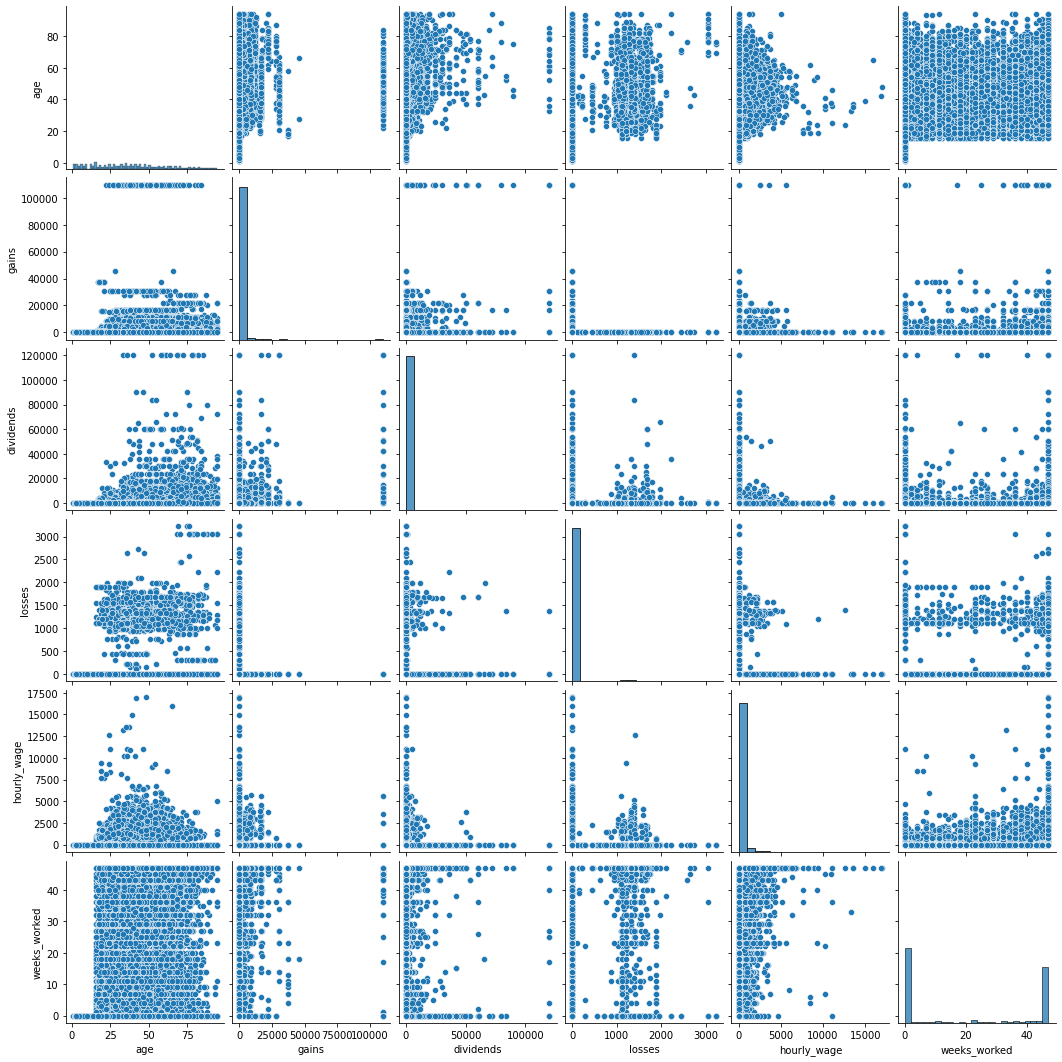

In [23]:
sns.pairplot(df[['age','gains','dividends','losses','hourly_wage','weeks_worked']]);

<AxesSubplot:>

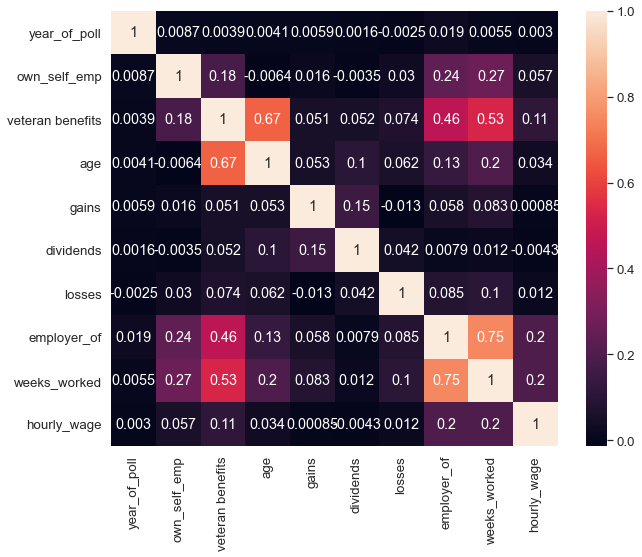

In [25]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df[numcol].corr(), annot=True)

In [27]:
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import tree

In [30]:
dftrain = df.copy()

In [31]:
### Slicing data ###
X = dftrain.drop('income',axis=1)
y = dftrain.pop('income')
X.head()


# X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,...,losses,employer_of,house_1yr_ago,income_filled,weeks_worked,hourly_wage,citizenship,woker_type,fed_liability,full_partime_job
0,2004,0,2,1,4,1,7,4,2,0,...,0.0,1,0,0,47,0.0,3,3,2,0
1,2005,0,0,0,4,0,10,1,14,0,...,0.0,0,1,0,0,0.0,3,2,4,0
2,2004,0,2,2,4,1,16,10,10,0,...,0.0,6,0,1,47,0.0,3,3,5,0
3,2004,0,2,0,0,1,12,4,23,0,...,0.0,2,1,0,47,0.0,3,3,2,0
4,2004,0,2,2,4,1,12,4,23,0,...,0.0,3,1,0,47,0.0,3,3,5,0


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 100)

In [33]:
### Desicion Tree with Gini Index ###

dt_clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=5, min_samples_leaf=5)
dt_clf_gini.fit(X_train, y_train)
### Desicion Tree with Information Gain ###

dt_clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=5, min_samples_leaf=5)

dt_clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=100)

In [34]:
y_pred_gini = dt_clf_gini.predict(X_test)
y_pred_en = dt_clf_entropy.predict(X_test)

In [36]:
print ("Desicion Tree using Gini Index\nAccuracy is ", accuracy_score(y_test,y_pred_gini)*100,"\n\nPrecision Value is\n",metrics.classification_report(y_test,y_pred_gini))
print ("Desicion Tree using Information Gain\nAccuracy is ", accuracy_score(y_test,y_pred_en)*100,"\n\nPrecision Value is\n",metrics.classification_report(y_test,y_pred_en))

Desicion Tree using Gini Index
Accuracy is  63.98412698412699 

Precision Value is
               precision    recall  f1-score   support

           0       0.64      0.97      0.77     19638
           1       0.65      0.09      0.16     11862

    accuracy                           0.64     31500
   macro avg       0.65      0.53      0.47     31500
weighted avg       0.64      0.64      0.54     31500

Desicion Tree using Information Gain
Accuracy is  63.99682539682539 

Precision Value is
               precision    recall  f1-score   support

           0       0.64      0.97      0.77     19638
           1       0.65      0.09      0.17     11862

    accuracy                           0.64     31500
   macro avg       0.65      0.53      0.47     31500
weighted avg       0.64      0.64      0.54     31500



In [38]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(y_test != y_pred).sum()))
print ("\nAccuracy is ", accuracy_score(y_test,y_pred)*100,"\n\nPrecision Value is\n",metrics.classification_report(y_test,y_pred))

Number of mislabeled points out of a total 73500 points : 11607

Accuracy is  63.15238095238095 

Precision Value is
               precision    recall  f1-score   support

           0       0.64      0.95      0.76     19638
           1       0.56      0.10      0.16     11862

    accuracy                           0.63     31500
   macro avg       0.60      0.53      0.46     31500
weighted avg       0.61      0.63      0.54     31500



In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
print ("\nAccuracy is ", accuracy_score(y_test,y_pred)*100,"\n\nPrecision Value is\n",classification_report(y_test,y_pred))


Accuracy is  61.56507936507937 

Precision Value is
               precision    recall  f1-score   support

           0       0.65      0.84      0.73     19638
           1       0.48      0.24      0.32     11862

    accuracy                           0.62     31500
   macro avg       0.56      0.54      0.53     31500
weighted avg       0.58      0.62      0.58     31500



In [41]:
model = SVC(kernel='rbf',decision_function_shape='ovr',max_iter=9000)
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

In [42]:
print("\nAccuracy is ", accuracy_score(y_test,y_pred)*100,"\n\nPrecision Value is\n",metrics.classification_report(y_test,y_pred))


Accuracy is  50.780952380952385 

Precision Value is
               precision    recall  f1-score   support

           0       0.63      0.52      0.57     19638
           1       0.38      0.50      0.43     11862

    accuracy                           0.51     31500
   macro avg       0.51      0.51      0.50     31500
weighted avg       0.54      0.51      0.52     31500

